# Psychoinformatics - Week 11 (Examples)
by Tsung-Ren (Tren) Huang (trhuang@g.ntu.edu.tw)

In [ ]:
%config IPCompleter.greedy=True
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Neural Computation

### 1.1 Logic Operations

In [ ]:
# Supporting functions: -----------------------
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y
#----------------------------------------------

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1]) # try AND, OR, NAND
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


### 1.2 Perceptron w/o learning

-1
-1
1
1
1


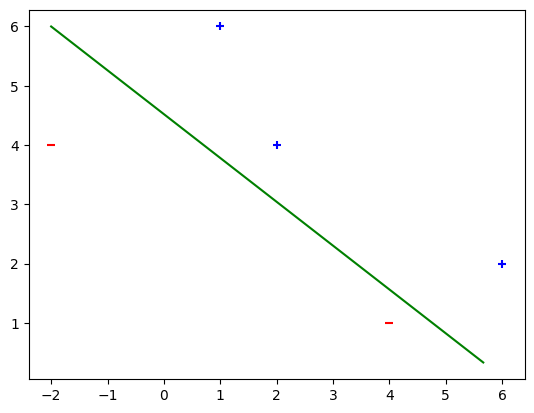

In [ ]:
X = array([   #[x1,x2,bias]
    [-2,4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = array([-1,-1,1,1,1])

# The hyperplane:
w=[2, 3, 13] # w0x0+w1x1-w2=0 => x1=(w2-w0x0)/w1
y1=(w[2]-w[0]*(-2))/w[1] # y of the 1st point on the hyperplane: (-2, y1)
y2=(w[2]-w[0]*6)/w[1] # y of the 2nd point on the hyperplane: (6, y2)

# Testing:
for i, x in enumerate(X):
    print(sign(dot(x, w)))

# Ploting:
for i, x in enumerate(X): # samples
    if(i<2): scatter(x[0],x[1],marker='_',color='r') # the first two points belong to "-"
    else: scatter(x[0],x[1],marker='+',color='b') # the last three points belong to "+"
plot([-2,y1],[6,y2],'g'); # the hyperplane

## 2 Learning of Neural Networks

### 2.1 Perceptron w/ learning

-1.0
-1.0
1.0
1.0
1.0


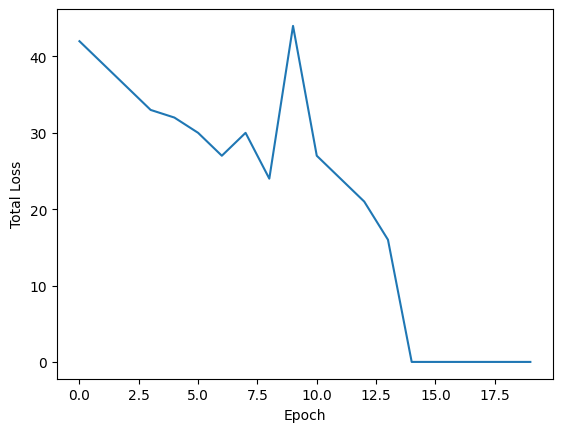

In [ ]:
# Supporting functions: -----------------------
def sgd(X, Y): # Stochastic Gradient Descent
    w = zeros(len(X[0]))
    eta = 1 # learning rate
    epochs = 20 # number of training epochs
    errors = [] # error history during training
    for t in range(epochs):
        total_error = 0
        for p, x in enumerate(X): # p=pattern index
            if (dot(X[p], w)*Y[p]) <= 0:
                total_error += (dot(X[p], w)*Y[p])
                w = w + eta*X[p]*Y[p] # learning rule
        errors.append(total_error*-1)
    plot(errors); xlabel('Epoch'); ylabel('Total Loss')
    return w
#----------------------------------------------


X = array([   #[x1,x2,bias]
    [-2,4, -1],
    [4,1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = array([-1,-1,1,1,1])

# Learning:
w = sgd(X,y)

# Testing:
for i, x in enumerate(X):
    print(sign(dot(X[i], w)))

## 3 Deep Learning Neural Networks

### 3.0 The Iris Dataset

In [ ]:
from sklearn import *
iris = datasets.load_iris()
X=iris.data
Y=iris.target
print(X)
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### 3.1 A 2-layer Network in Keras

In [ ]:
from tensorflow.keras.utils import to_categorical

encoded = to_categorical(Y) # one-hot encoding
print(encoded)
decoded = argmax(encoded,1) # one-hot decoding
print(decoded)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Easy problem using all the 4 features:
model = Sequential()
model.add(Dense(units=3, activation='softmax')) #winner-takes-all computation: https://en.wikipedia.org/wiki/Softmax_function
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(X, to_categorical(Y), epochs=20, batch_size=15) # 9*15=135

Epoch 1/20
10/10 [==============================] - 0s 3ms/step - loss: 2.1683 - accuracy: 0.4067
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: 0.7101 - accuracy: 0.6600
Epoch 3/20
10/10 [==============================] - 0s 3ms/step - loss: 0.6118 - accuracy: 0.6533
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: 0.5940 - accuracy: 0.6067
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: 0.5818 - accuracy: 0.6400
Epoch 6/20
10/10 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.6533
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.6533
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 0.5614 - accuracy: 0.6867
Epoch 9/20
10/10 [==============================] - 0s 3ms/step - loss: 0.5665 - accuracy: 0.6733
Epoch 10/20
10/10 [==============================] - 0s 4ms/step - loss: 0.5556 - accuracy: 0.6800
Epoch 11/20
10/10 [

In [ ]:
# Testing on the training data:
model.predict(X)

5/5 [==============================] - 0s 3ms/step


array([[0.7391527 , 0.22525208, 0.03559517],
       [0.6715735 , 0.2601754 , 0.06825111],
       [0.71413517, 0.2409508 , 0.04491403],
       [0.67971694, 0.26050562, 0.05977742],
       [0.75188595, 0.2181474 , 0.02996671],
       [0.7395818 , 0.23311758, 0.02730053],
       [0.7223208 , 0.24246901, 0.03521024],
       [0.7176477 , 0.23869066, 0.04366173],
       [0.6629156 , 0.26845515, 0.06862926],
       [0.6844796 , 0.2495438 , 0.06597663],
       [0.7514666 , 0.21690471, 0.03162862],
       [0.70961416, 0.24524447, 0.04514137],
       [0.6817794 , 0.2504475 , 0.0677731 ],
       [0.7203905 , 0.23379754, 0.04581197],
       [0.80407006, 0.17866273, 0.01726719],
       [0.80400354, 0.18418533, 0.01181111],
       [0.7732488 , 0.2077314 , 0.01901981],
       [0.73046786, 0.23457749, 0.03495465],
       [0.73410827, 0.23101145, 0.03488027],
       [0.7565344 , 0.21872753, 0.024738  ],
       [0.6920681 , 0.2501342 , 0.05779772],
       [0.73642546, 0.23547322, 0.02810126],
       [0.

In [ ]:
!pip install livelossplot

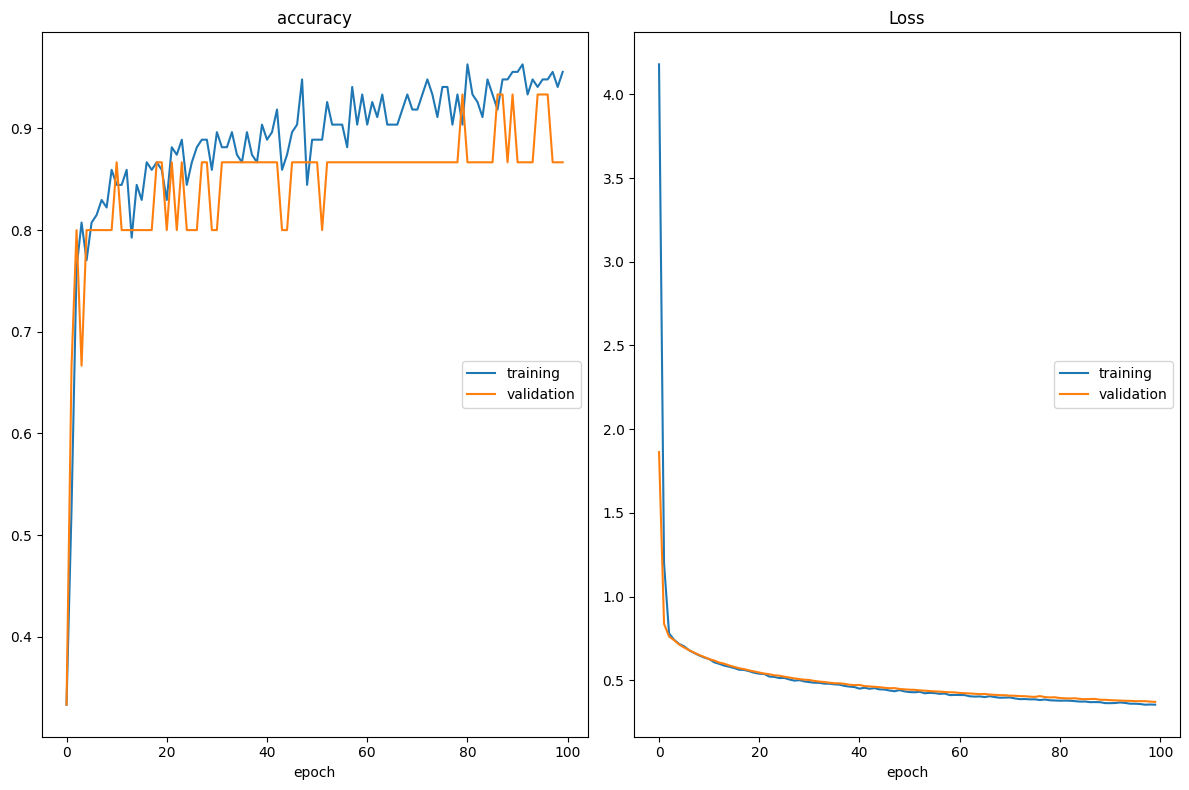

accuracy
	training         	 (min:    0.333, max:    0.963, cur:    0.956)
	validation       	 (min:    0.333, max:    0.933, cur:    0.867)
Loss
	training         	 (min:    0.355, max:    4.179, cur:    0.355)
	validation       	 (min:    0.372, max:    1.863, cur:    0.372)

Epoch 100: val_loss improved from 0.37325 to 0.37173, saving model to dnn.h5
9/9 [==============================] - 1s 64ms/step - loss: 0.3549 - accuracy: 0.9556 - val_loss: 0.3717 - val_accuracy: 0.8667
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (15, 3)                   15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train-test split:
sss=model_selection.StratifiedShuffleSplit(n_splits=1,test_size=0.1) # 135 vs. 15
for train_index, test_index in sss.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

# Better visualization for model training:
from livelossplot import PlotLossesKeras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

model = Sequential()
model.add(Dense(units=3, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=10, verbose=1) # Stop when training
ck = ModelCheckpoint(filepath='dnn.h5', verbose=1, save_best_only=True, monitor='val_loss')
model.fit(X_train, to_categorical(Y_train), epochs=100, batch_size=15, validation_data=(X_test, to_categorical(Y_test)),callbacks=[PlotLossesKeras(),es,ck])

model=load_model('dnn.h5')
model.summary()

### 3.2 A 3-layer Network in Keras

In [ ]:
# See if a more complex model is more accuracy:
from keras.models import clone_model

model = Sequential()
model.add(Dense(units=3, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

acc=[]
sss3=model_selection.StratifiedShuffleSplit(n_splits=3,test_size=0.1) # 135 vs. 15
for train_index, test_index in sss3.split(X, Y): # 3-fold cross-validation
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    new_model=clone_model(model) # Otherwise the old model will keep learning
    new_model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
    new_model.fit(X_train, to_categorical(Y_train), epochs=100, batch_size=15)
    acc.append(np.mean(argmax(new_model.predict(X_test),1)==Y_test)) # testing
print(acc,np.mean(acc))

Epoch 1/100
9/9 [==============================] - 0s 3ms/step - loss: 3.1966 - accuracy: 0.3333
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 1.6396 - accuracy: 0.4519
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 1.1123 - accuracy: 0.3333
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 1.0883 - accuracy: 0.3407
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 1.0772 - accuracy: 0.3481
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 1.0666 - accuracy: 0.4000
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 1.0572 - accuracy: 0.5704
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 1.0501 - accuracy: 0.6296
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 1.0435 - accuracy: 0.6444
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 1.0360 - accuracy: 0.6593
Epoch 11/100
9/9 [===========

## 4 eXplainable AI (XAI)

### 4.1 SHAP values

See more examples [here](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Iris%20classification%20with%20scikit-learn.html#), where feature importance is shown only for Y=0.



In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.1 MB/s eta 0:00:00


In [ ]:
model=load_model('dnn.h5')
explainer = shap.KernelExplainer(model, X)
shap_values=explainer.shap_values(X)

  0%|          | 0/150 [00:00<?, ?it/s]

### 4.2 Force plots
Note that:

[1] These are interactive plots! You can click the box under [js] to re-sort the 150 samples on the x-axis (try "original sample ordering"). In other words, a particular x value correspond to a particular sample.

[2] The Iris classification problem has three output dimensions to be explained: Y=[Y1, Y2, Y3]. We'll plot feature importance separately for Y1, Y2, and then Y3.

[3] In the Iris dataset,
The predicted Y for samples #001-#050 should be close to [1,0,0];
The predicted Y for samples #051-#100 should be close to [0,1,0];
The predicted Y for samples #101-#150 should be close to [0,0,1].

So, when we focus on the explanation for Y1, you will see that 50 samples (i.e., samples #1-#50) predicted Y1=f(x)\~1 and 100 samples (i.e., samples #51-#150) predicted Y1=f(x)~0.

[4] In the force plot, red representing features that pushed the f(x) score higher (i.e., toward 1), and blue representing features that pushed the f(x) score lower (i.e., toward 0).

In [ ]:
# Visualize feature importance for Y=[1,0,0] (setosa):
# You can see that 'petal length' is the diagnostic feature of setosa
shap.initjs()
shap.force_plot(explainer.expected_value[0],shap_values[0], feature_names=iris.feature_names)

In [ ]:
# Visualize feature importance for Y=[0,1,0] (versicolor):
# 'petal length' & 'petal width' are both informative for versicolor
shap.initjs()
shap.force_plot(explainer.expected_value[1],shap_values[1], feature_names=iris.feature_names)

In [ ]:
# Visualize feature importance for Y=[0,0,1] (virginica):
# 'petal length' & 'petal width' are both informative for virginica
shap.initjs()
shap.force_plot(explainer.expected_value[2],shap_values[2], feature_names=iris.feature_names)